# Bibliotecas

In [897]:
## Importando as Bibliotecas Necessárias ##
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, cohen_kappa_score, precision_score, recall_score
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from numpy.linalg import inv
from copy import copy
from sklearn.metrics import RocCurveDisplay

sns.set()

In [898]:
# Lendo a base de dados
df = pd.read_excel("m.xlsx")

xp = copy(df)

xraw = copy(xp)

xp.shape

(25976, 25)

# Codigo processamento

In [900]:
df = copy(xp)
df.isnull().sum()

Column1                              0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [899]:
xp['Arrival Delay in Minutes'] = xp['Arrival Delay in Minutes'].replace(np.nan, 0)

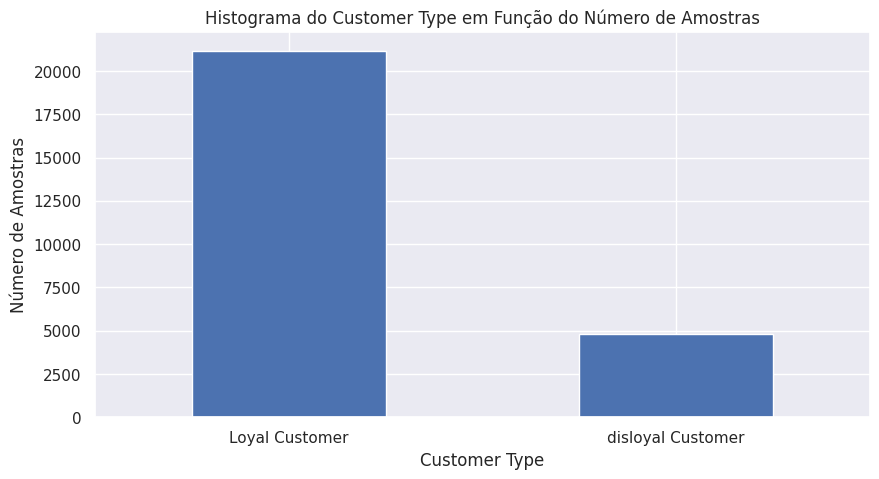

In [884]:
# Contando a quantidade de dados de cada classe
df=xp
contagem_classes = df['Customer Type'].value_counts()

# Plotando o histograma das classes
plt.figure(figsize=(10, 5))
contagem_classes.plot(kind='bar')
plt.xlabel('Customer Type')
plt.ylabel('Número de Amostras')
plt.title('Histograma do Customer Type em Função do Número de Amostras')
plt.xticks(rotation=360)
plt.show()

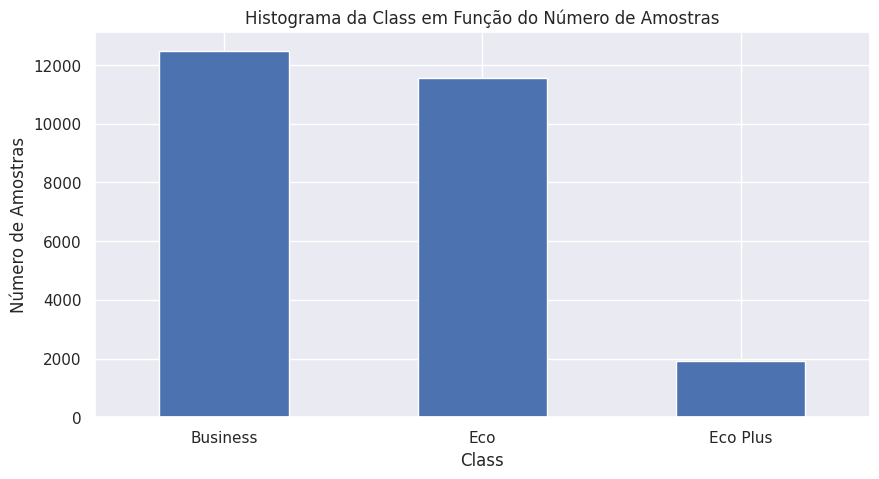

In [885]:
# Contando a quantidade de dados de cada classe
df=xp
contagem_classes = df['Class'].value_counts()

# Plotando o histograma das classes
plt.figure(figsize=(10, 5))
contagem_classes.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Número de Amostras')
plt.title('Histograma da Class em Função do Número de Amostras')
plt.xticks(rotation=360)
plt.show()

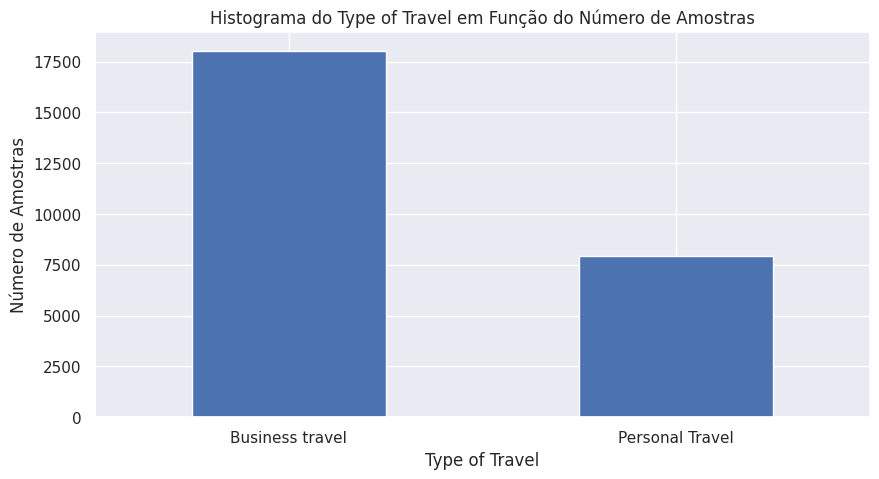

In [886]:
# Contando a quantidade de dados de cada classe
df=xp
contagem_classes = df['Type of Travel'].value_counts()

# Plotando o histograma das classes
plt.figure(figsize=(10, 5))
contagem_classes.plot(kind='bar')
plt.xlabel('Type of Travel')
plt.ylabel('Número de Amostras')
plt.title('Histograma do Type of Travel em Função do Número de Amostras')
plt.xticks(rotation=360)
plt.show()

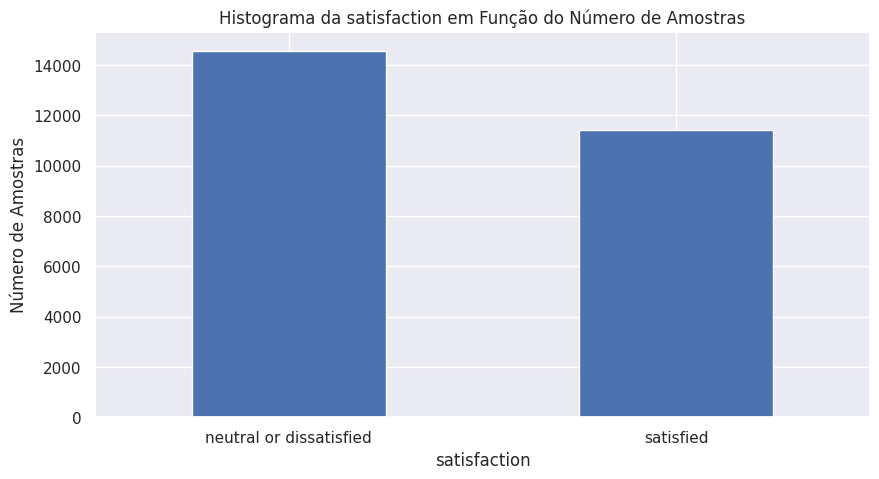

In [887]:
# Contando a quantidade de dados de cada classe
df=xp
contagem_classes = df['satisfaction'].value_counts()

# Plotando o histograma das classes
plt.figure(figsize=(10, 5))
contagem_classes.plot(kind='bar')
plt.xlabel('satisfaction')
plt.ylabel('Número de Amostras')
plt.title('Histograma da satisfaction em Função do Número de Amostras')
plt.xticks(rotation=360)
plt.show()

In [888]:
atributos_numericos = df.select_dtypes(include=['float64', 'int64'])

# Calcula a assimetria para cada atributo numérico
assimetria = atributos_numericos.skew()

# Exibe a assimetria de cada atributo
print(assimetria)

Column1                              0.000000
id                                  -0.011364
Age                                 -0.000088
Flight Distance                      1.102927
Inflight wifi service                0.040792
Departure/Arrival time convenient   -0.324685
Ease of Online booking              -0.020655
Gate location                       -0.055798
Food and drink                      -0.170229
Online boarding                     -0.469218
Seat comfort                        -0.498047
Inflight entertainment              -0.371353
On-board service                    -0.426507
Leg room service                    -0.341210
Baggage handling                    -0.678863
Checkin service                     -0.373016
Inflight service                    -0.696803
Cleanliness                         -0.304285
Departure Delay in Minutes           7.193970
Arrival Delay in Minutes             6.994086
dtype: float64


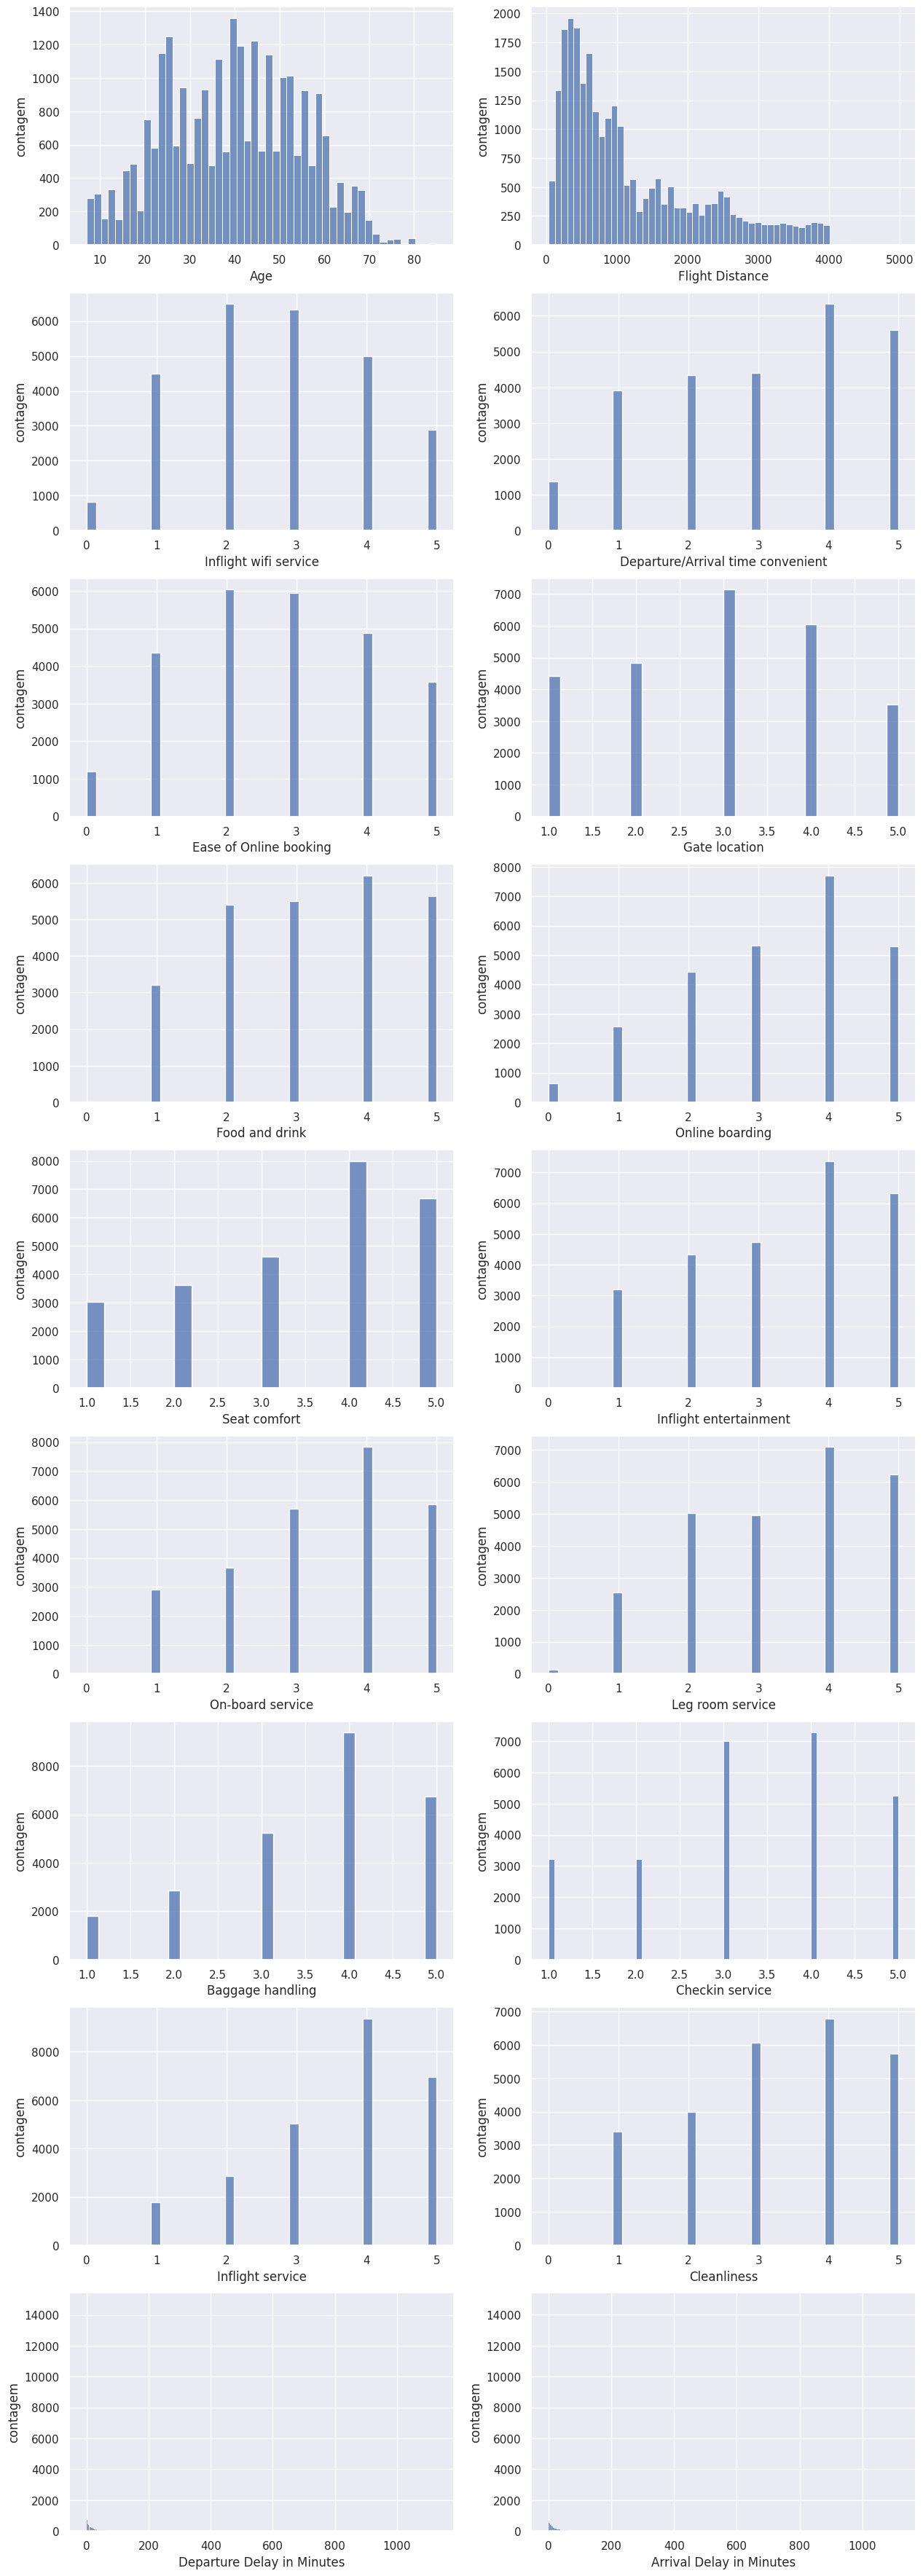

In [889]:
#aplicando histogramas para os atributos contínuos:
def multigraficos_histograma(data, nrows, ncols, nomes):
    fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize=(15, 5*nrows))
    k = 0
    for i in range(nrows):
        for j in range(ncols):
            sns.histplot(ax = axs[i,j], data = data, x = nomes[k])
            axs[i, j].set_xlabel(nomes[k])
            axs[i, j].set_ylabel("contagem")
            k+=1
        #
    #
#

nrows = 9
ncols = 2
multigraficos_histograma(df, nrows, ncols, var_num)

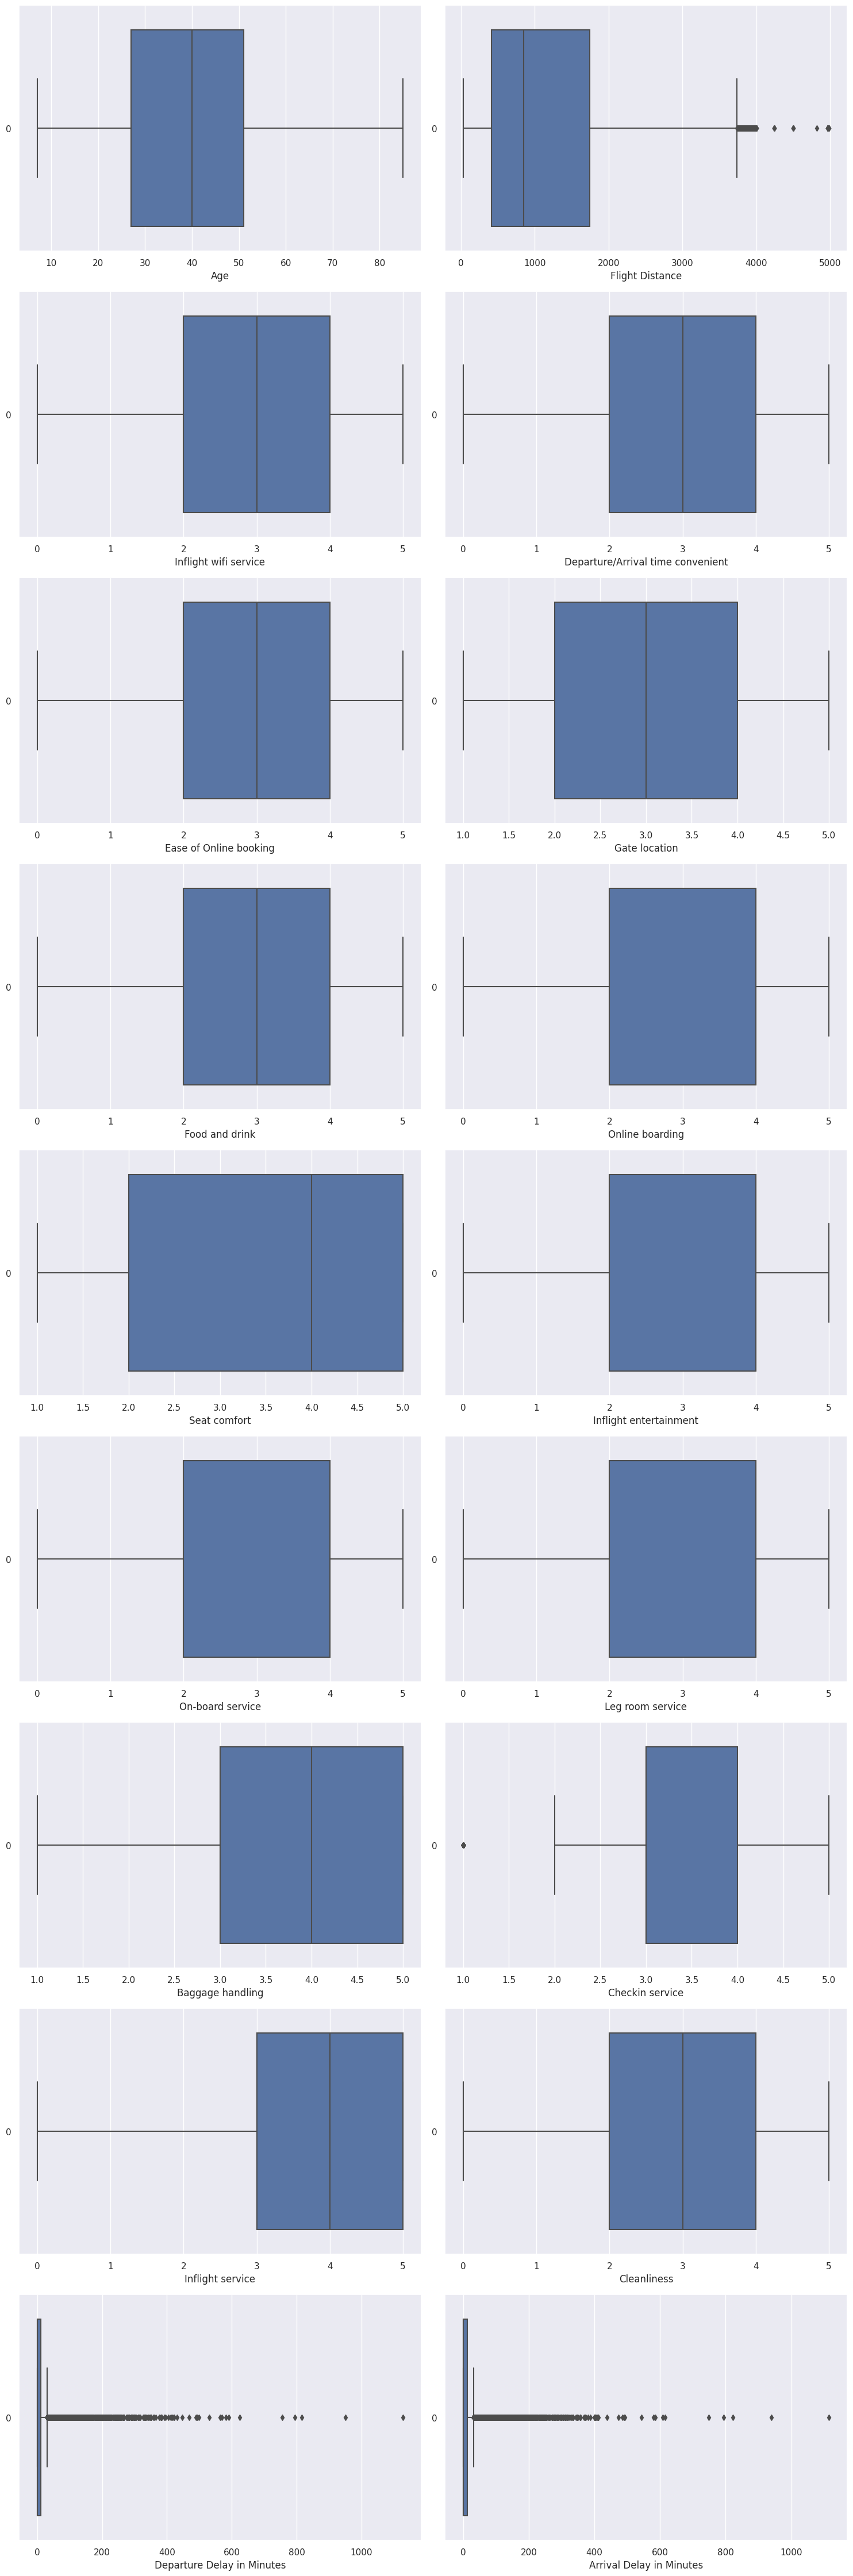

In [890]:
# boxplot

var_num = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
           'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service',
           'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness',
           'Departure Delay in Minutes', 'Arrival Delay in Minutes']

nrows = 9
ncols = 2
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))

for i, var in enumerate(var_num):
    row = i // ncols
    col = i % ncols
    sns.boxplot(ax=axs[row, col], data=df[var].dropna(), orient='h')
    axs[row, col].set_xlabel(var)

plt.tight_layout()


In [891]:
print("Variaveis com outliers: \n")

dsc = df[var_num].describe() #obtendo estatísticas descritivas dos atributos numericos

for name in dsc.columns:
    q1 = dsc[name]["25%"]
    q3 = dsc[name]["75%"]
    iqr = q3-q1

    min_ = q1 - 1.5*iqr
    max_ = q3 + 1.5*iqr

    out_inf = np.where(df[name] < min_)[0]
    out_sup = np.where(df[name] > max_)[0]

    if ((out_inf.shape[0] > 0) or (out_sup.shape[0] > 0)):
        print(name)
    #
#


Variaveis com outliers: 

Flight Distance
Checkin service
Departure Delay in Minutes
Arrival Delay in Minutes


# Classificação Linear

In [901]:
df.corr(method='spearman').style.background_gradient(cmap='coolwarm')

,Column1,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Column1,1.000000,0.006889,-0.008206,-0.002322,-0.003532,-0.003789,-0.002222,-0.001078,-0.010043,0.001093,-0.004468,-0.011029,0.000951,-0.003310,0.001747,0.001962,-0.005868,-0.003535,-0.007563,-0.002687
id,0.006889,1.000000,0.014094,0.134367,-0.031660,-0.003406,0.009216,0.002237,-0.007904,0.056276,0.051489,-0.000835,0.054226,0.038373,0.066637,0.075271,0.071027,0.018459,0.056416,-0.000068
Age,-0.008206,0.014094,1.000000,0.074394,0.007254,0.029867,0.010127,0.001820,0.021836,0.206976,0.153589,0.073733,0.067881,0.044322,-0.029406,0.029182,-0.042458,0.047806,-0.002139,-0.004865
Flight Distance,-0.002322,0.134367,0.074394,1.000000,0.002596,-0.008876,0.057619,0.006139,0.044451,0.192243,0.138861,0.112542,0.109271,0.119719,0.069701,0.074448,0.071162,0.089002,0.019703,-0.002418
Inflight wifi service,-0.003532,-0.031660,0.007254,0.002596,1.000000,0.343469,0.707514,0.345670,0.119902,0.435962,0.111958,0.192678,0.109330,0.149755,0.109526,0.045607,0.104555,0.122174,-0.023368,-0.032841
Departure/Arrival time convenient,-0.003789,-0.003406,0.029867,-0.008876,0.343469,1.000000,0.442511,0.463909,-0.017700,0.070337,-0.001597,-0.025824,0.061351,-0.001714,0.078020,0.087904,0.082955,-0.009003,-0.007152,-0.003975
Ease of Online booking,-0.002222,0.009216,0.010127,0.057619,0.707514,0.442511,1.000000,0.469197,0.021621,0.369473,0.017355,0.039318,0.038749,0.103574,0.035720,0.000386,0.034540,0.008255,-0.007195,-0.010605
Gate location,-0.001078,0.002237,0.001820,0.006139,0.345670,0.463909,0.469197,1.000000,-0.010186,0.002201,-0.002925,-0.002203,-0.032194,-0.002347,-0.015915,-0.054444,-0.014660,-0.014769,0.014220,0.014430
Food and drink,-0.010043,-0.007904,0.021836,0.044451,0.119902,-0.017700,0.021621,-0.010186,1.000000,0.236103,0.560461,0.613431,0.050640,0.033438,0.050351,0.072979,0.050943,0.647138,-0.022254,-0.024547
Online boarding,0.001093,0.056276,0.206976,0.192243,0.435962,0.070337,0.369473,0.002201,0.236103,1.000000,0.437239,0.296994,0.171435,0.132556,0.119922,0.215437,0.105415,0.336259,-0.032001,-0.046754


In [902]:
df = copy(xp)
leal = df[df['Customer Type'] == 'Loyal Customer'].iloc[:500]
desleal = df[df['Customer Type'] == 'disloyal Customer'].iloc[:500]

df = pd.concat([leal, desleal])

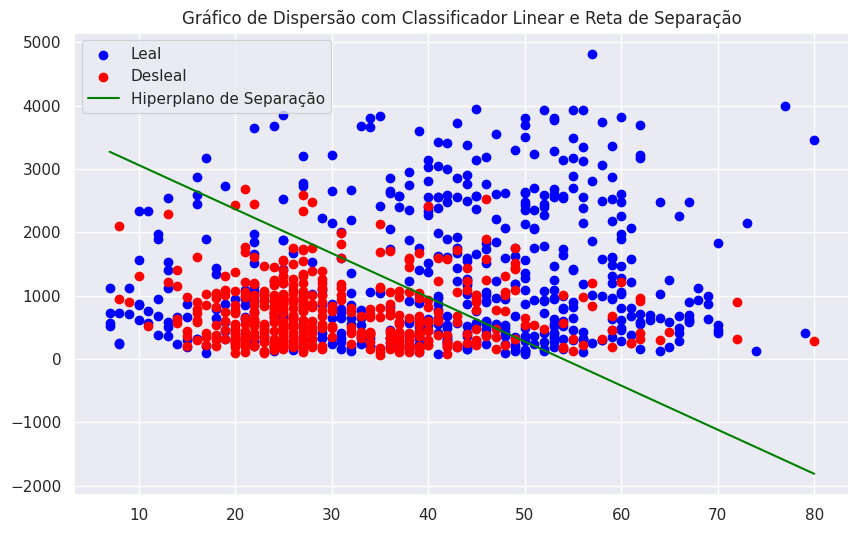

In [903]:
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': -1})

df['Age'] = (df['Age'])
df['Flight Distance'] = (df['Flight Distance'])
df['Gate location'] = (df['Gate location'])
df['Food and drink'] = (df['Food and drink'])
df['On-board service'] = (df['On-board service'])
df['Leg room service'] = (df['Leg room service'])
df['Baggage handling'] = (df['Baggage handling'])
df['Checkin service'] = (df['Checkin service'])

X = df[['Age', 'Flight Distance', 'Checkin service', 'Baggage handling', 'Leg room service', 'On-board service', 'Food and drink', 'Gate location']].values
y = df['Customer Type'].values

X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)

w = np.dot(inv(np.dot(X.T, X)), np.dot(X.T, y))

w1, w2, w0 = w[0], w[1], w[8]

x_hyperplane = np.linspace(X[:, 0].min(), X[:, 0].max(), 1000)
y_hyperplane = (-w0 - w1 * x_hyperplane) / w2

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Leal', c='blue')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], label='Desleal', c='red')
plt.plot(x_hyperplane, y_hyperplane, color='green', label='Hiperplano de Separação')
plt.legend()
plt.title('Gráfico de Dispersão com Classificador Linear e Reta de Separação')
plt.grid(True)
plt.show()

# Criação dos dados iniciais

In [904]:
df = copy(xp)

leal = df[df['Customer Type'] == 'Loyal Customer'].iloc[:12000]
desleal = df[df['Customer Type'] == 'disloyal Customer'].iloc[:12000]

df = pd.concat([leal, desleal])

df['Customer Type'] = df['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': -1})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Type of Travel'] = df['Type of Travel'].map({'Business travel': 1, 'Personal Travel': 0})
df['Class'] = df['Class'].map({'Business': 1, 'Eco': -1, 'Eco Plus': 0})
df['satisfaction'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

df['Flight Distance'] = np.log(df['Flight Distance'])
df['Arrival Delay in Minutes'] = np.log1p(df['Arrival Delay in Minutes'])
df['Age'] = np.sqrt(df['Age'])
df['Departure Delay in Minutes'] = np.log1p(df['Arrival Delay in Minutes'])

df.drop(['id'], axis = 1, inplace = True)
df.drop(['Column1'], axis = 1, inplace = True)
df.drop(['Cleanliness'], axis = 1, inplace = True)
df.drop(['Ease of Online booking'], axis = 1, inplace = True)
df.drop(['Inflight entertainment'], axis = 1, inplace = True)
df.drop(['Arrival Delay in Minutes'], axis = 1, inplace = True)

X = df.drop(['satisfaction'], axis = 1).values
y = df['satisfaction'].values

# Classifição Naive-Bayes


In [905]:
#Frequencia:
#    Não     Sim
#0 = 2     = 811  = 813/25976  = 0.0313%
#1 = 2966  = 1522 = 4488/25976 = 0.1727%
#2 = 4923  = 1567 = 6490/25976 = 0.2498%
#3 = 4694  = 1623 = 6317/25976 = 0.2431%
#4 = 1953  = 3028 = 4981/25976 = 0.1917%
#5 = 35    = 2852 = 2887/25976 = 0.1111%
#Total = 14573/25976 = 0.561% | 11403/25976 = 0.439%
#TotalTudo = 25976

#Prob ser insatisfeito e dar 0:
#P0N = 2/14573 PN = 14573/25976 P0 = 813/25976
PN0 = (2/14573) * (0.561)/(0.0313)
PS0 = 1 - PN0
#Prob ser insatisfeito e dar 1:
#P0N = 2/14573 PN = 14573/25976 813/25976
PN1 = (2966/14573) * (0.561)/(0.1727)
PS1 = 1 - PN1
#Prob ser insatisfeito e dar 2:
#P0N = 2/14573 PN = 14573/25976 813/25976
PN2 = (4923/14573) * (0.561)/(0.2498)
PS2 = 1 - PN2
#Prob ser insatisfeito e dar 3:
#P0N = 2/14573 PN = 14573/25976 813/25976
PN3 = (4694/14573) * (0.561)/(0.2431)
PS3 = 1 - PN3
#Prob ser insatisfeito e dar 4:
#P0N = 2/14573 PN = 14573/25976 813/25976
PN4 = (1953/14573) * (0.561)/(0.1917)
PS4 = 1 - PN4
#Prob ser insatisfeito e dar 5:
#P0N = 2/14573 PN = 14573/25976 813/25976
PN5 = (35/14573) * (0.561)/(0.1111)
PS5 = 1/100 - PN5

In [906]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125, stratify = y
)

In [907]:
# Build a Gaussian Classifier
clf = GaussianNB()

# Model training
clf.fit(X_train, y_train)

# Predict Output
predicted = clf.predict([X_test[6]])

print("Actual Value:", y_test[6])
print("Predicted Value:", predicted[0])

Actual Value: 0
Predicted Value: 0


In [908]:
y_pred = clf.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
kappa = cohen_kappa_score(y_pred, y_test)
prec = precision_score(y_pred, y_test)
recal = recall_score(y_pred, y_test)

print("Accuracy:", accuray)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("Precision:", prec)
print("Recall:", recal)

Accuracy: 0.8542568542568543
F1 Score: 0.8543312755435788
Kappa: 0.699660152931181
Precision: 0.8211805555555556
Recall: 0.8269230769230769


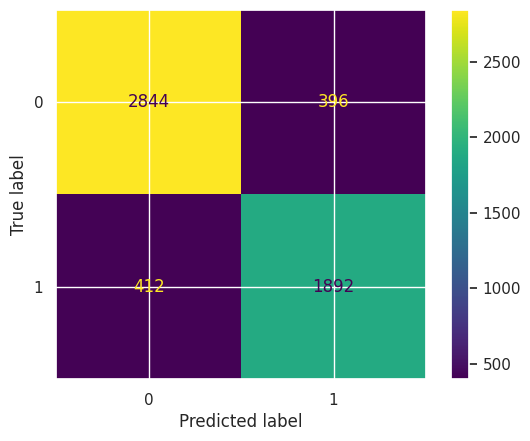

In [909]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

# Classificação Árvore de Decisão (simples)

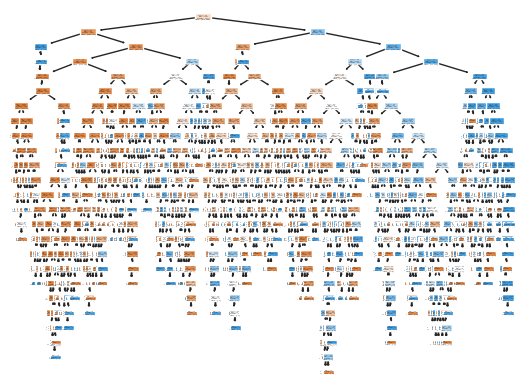

In [910]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y.astype(float))
tree.plot_tree(clf,filled=True)
y_pred = clf.predict(X_test)

In [911]:
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
kappa = cohen_kappa_score(y_pred, y_test)
prec = precision_score(y_pred, y_test)
recal = recall_score(y_pred, y_test)

print("Accuracy:", accuray)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("Precision:", prec)
print("Recall:", recal)

Accuracy: 1.0
F1 Score: 1.0
Kappa: 1.0
Precision: 1.0
Recall: 1.0


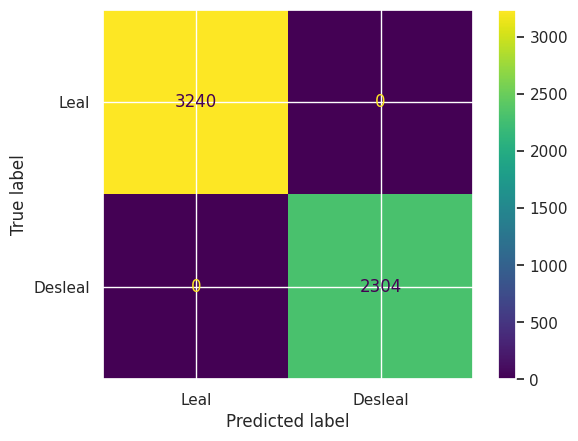

In [912]:
labels = ["Leal", "Desleal"]
cm = confusion_matrix(y_test, y_pred)
labels = ["Leal", "Desleal"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

# Classificação Rede Neural MLP


In [913]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
y_pred = clf.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
kappa = cohen_kappa_score(y_pred, y_test)
prec = precision_score(y_pred, y_test)
recal = recall_score(y_pred, y_test)

print("Accuracy:", accuray)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("Precision:", prec)
print("Recall:", recal)

Accuracy: 0.9431818181818182
F1 Score: 0.9431487042288005
Kappa: 0.8831686792834539
Precision: 0.9357638888888888
Recall: 0.9281102023245803


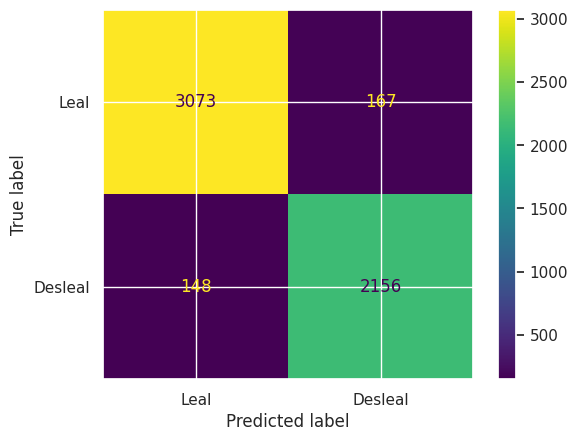

In [914]:
labels = ["Leal", "Desleal"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

# Random Florest

In [915]:
clf = RandomForestClassifier(n_estimators = 800)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
f1 = f1_score(y_pred, y_test, average="weighted")
kappa = cohen_kappa_score(y_pred, y_test)
prec = precision_score(y_pred, y_test)
recal = recall_score(y_pred, y_test)

print("Accuracy:", accuray)
print("F1 Score:", f1)
print("Kappa:", kappa)
print("Precision:", prec)
print("Recall:", recal)

Accuracy: 0.9431818181818182
F1 Score: 0.9483162643456127
Kappa: 0.8930984941201511
Precision: 0.9270833333333334
Recall: 0.9472283813747229


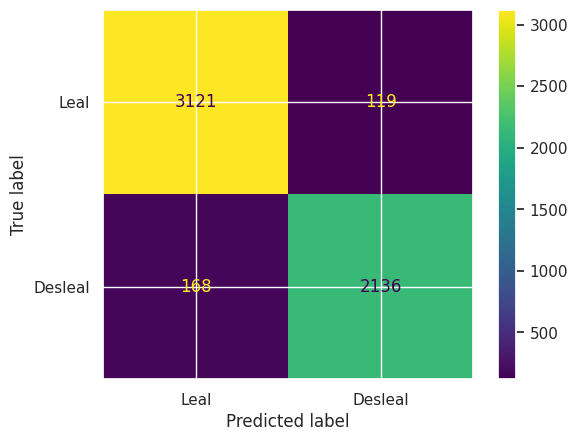

In [916]:
labels = ["Leal", "Desleal"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

# ROC

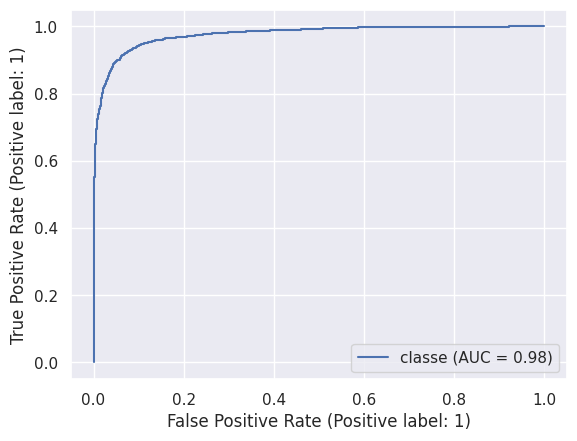

In [849]:
clf = SVC(random_state=0).fit(X_train, y_train)
y_pred = clf.decision_function(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred,name='classe')
plt.show()